<center><font size='8'>X光编程作业<font/>

<center><font size='5'>张锦程&thinsp; 材84&thinsp; 2018012082<font/>

<br/>

###### 编程语言：Python&emsp; version：3.7.7&emsp; date：2020/10/18&emsp; structure：$YBa_2Cu_3O_{9-x}(x\approx 2)$

    
---
    


本项目利用理论计算的方式计算超导材料钇钡铜氧的 X 射线衍射线的相对强度，假定样品为粉末状多晶体，X 射线采用 $Cu-K_\alpha$ 特征辐射（1.54178 Å）。
    
假定 $YBa_2Cu_3O_{9-x}(x\approx 2)$ 体系中 $x=2$，仅考虑 Ba 面或 Cu 面上缺氧的两种可能性，两种可能性如下图所示：
    
<img src="untitled.assets/1.png" alt="1" style="width: 16;" />
    
Ba 面上缺氧即图中的 1、2 位置，Cu 面上缺氧即图中的 3、4 位置。

### 粉末多晶样品 X 射线衍射强度计算
    
计算 X 射线散射强度首先要求 Y、Ba、Cu、O 等原子的散射因子 $f_i$ （$\frac{\text{该种原子产生的散射线振幅}}{\text{一个电子产生的散射线振幅}}$），它是一个和散射角和 X 光波长都相关的量，具体数值可查相关晶体学用表进行插值估算，也可通过经验公式：$f_i=(sin\theta/\lambda)=\sum\limits_{j=1}^{4}a_{j_i}exp[-b_{j_i}(sin\theta/\lambda)^2]+c_i$ 进行近似计算。

得到散射因子后可由 $F_{hkl}^2=\sum\limits_{j}^{n}\sum\limits_{k}^{n}f_jf_ke^{i2\pi\vec s\cdot r_{jk}}$ 计算结构因子 $F_{hkl}^2$，它的定义为 $\frac{\text{单个晶格产生的散射线强度}}{\text{一个电子产生的散射线强度}}$，$r_{jk}$ 为晶格中第 i、j 号原子的相对坐标，$\vec s$ 可理解为动量空间（也叫倒易空间）中波矢的改变量 $\Delta\vec k$。
    
散射线的强度和 $F_{hkl}^2$ 成正比，同时也和散射角（布拉格角）$\theta$ 有关，具体来说，是和 $\frac{1+cos^22\theta}{sin^2\theta cos\theta}$ 成正比，上式也叫角因子（LP）。
    
除了结构因子 $F_{hkl}^2$ 和 角因子（LP）之外，多晶粉末散射强度还和另一个叫做多重因子（P）的量成正比，简单说来，是因为我们计算的 X 射线衍射强度是针对特定晶面族 ${hkl}$ 而言的，但每种晶面族所包含的晶面 $(hkl)$ 数目不一样，所以需要乘上这个数目上的修正。对 $YBa_2Cu_3O_{9-x}$ 所属的正交晶系而言，hkl 都不为 0 时 P 为 8；当 h、k、l 中有一个为 0 时 P 为 4；当 h、k、l 中有两个为 0 时 P 为 2。

如果要计算多晶粉末衍射的绝对强度，则还要考虑试样厚度、温度等众多其它影响因素。然而如果只要求相对散射强度，则讨论到此为止，因为其他因素对同一测试条件下同一式样中不同晶面族的散射强度影响相同。最终结果为： $I_{\text{相对}}=F_{hkl}^2(LP)P$
    
    
### 一些其他方面的说明：
    
在倒易点阵的计算中，有的参考书为了方便进行 Fourier 变换而引入了 $2\pi$ 的常量，本计算中相关常数取值为 1 ，也就是说 $\vec a_i\cdot\vec b_j = \delta_{ij}$
    
单位制方面，无特殊说明，以下计算距离单位为：Å；角度取弧度制；X射线散射强度参考电子衍射强度，且为相对值。
    
### 带解析源码部分：

In [1]:
# 引入计算库
import numpy as np
import matplotlib.pyplot as plt
import openpyxl

引入基本的模型输入数据：

In [2]:
# 正交晶系晶格基矢
a1 = 3.893 * np.array([1,0,0])
a2 = 11.688* np.array([0,1,0])
a3 = 3.820 * np.array([0,0,1])
a = a1+a2+a3

wav_len = 1.54178 # 所用 X 射线的波长

# 诸原子的坐标
coor_Ba = {'Y':[[1/2,1/2,1/2]],'Ba':[[1/2,1/6,1/2],[1/2,5/6,1/2]],
          'Cu':[[0,0,0],[0,1/3,0],[0,2/3,0]],'O':[[1/2,0,0],[0,0,1/2],[1/2,1/3,0],[0,1/3,1/2],
                [0,1/2,0],[1/2,2/3,0],[0,2/3,1/2]]}
coor_Cu = {'Y':[[1/2,1/2,1/2]],'Ba':[[1/2,1/6,1/2],[1/2,5/6,1/2]],
          'Cu':[[0,0,0],[0,1/3,0],[0,2/3,0]],'O':[[0,1/6,0],[1/2,1/3,0],[0,1/3,1/2],
                [0,1/2,0],[1/2,2/3,0],[0,2/3,1/2],[0,5/6,0]]}

# 查表得到的 f_i 计算式中的诸常数数值
############        a1      b1      a2      b2      a3      b3      a4       b4        c
fi_consts={'Y' :[17.9268,1.35417,9.15310,11.21450,1.76795,22.6599,-33.108,-0.01319,40.2602],
           'Ba':[20.1807,3.21367,19.1136,0.283310,10.9054,20.0558,0.77634,51.74600,3.02920],
           'Cu':[11.8168,3.37484,7.11181,0.244078,5.78135,7.98760,1.14523,19.89700,1.14431],
           'O' :[4.19160,12.8573,1.63969,4.172360,1.52673,47.0179,-20.307,-0.01404,21.9412]}
#下面是新版          a1      b1      a2      b2      a3      b3      a4       b4       c
fi_consts2={'Y' :[1.34006,1.03163,3.27025,7.153770,4.12082,34.5591,3.72874,112.5880,0.19642],
            'Ba':[2.19676,1.25255,4.67806,8.370510,5.20415,39.1838,5.87447,145.4860,0.29951],
            'Cu':[0.95193,0.94385,1.74900,4.464090,1.64503,21.0681,1.11668,79.64930,0.13474],
            'O' :[0.24115,0.80966,0.66042,3.719870,0.79431,11.1230,0.25232,30.35210,0.03513]}

通过经验式计算各原子的散射因子 $f_i$：

In [3]:
def cal_fi(name,X):  # name='Y','Ba','Cu','O'; X=sin(theta)/lambda
    cs = fi_consts[name]
    fi = cs[-1]   # c
    for i in range(4):
        fi += cs[2*i]*np.exp(-cs[2*i+1]*X**2)
    return fi
def cal_fi2(name,X):  # name='Y','Ba','Cu','O'; X=sin(theta)/lambda
    cs = fi_consts2[name]
    fi = cs[-1]   # c
    for i in range(4):
        fi += cs[2*i]*np.exp(-cs[2*i+1]*X**2)
    return fi

对 $f_i = f(\frac{sin\theta}{\lambda})$ 经验公式进行检验如下：

In [4]:
# 经多组数据验算，用以上参数计算得到的 fi 貌似和《X射线衍射技术》（潘峰版）书后附表 10 所列各元素参考值有小出入，但是差别不大，普遍在 1 以内，可能是参照版本不同导致
Yfs=[];Bafs=[];Cufs=[];Ofs=[]
for x in [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.2]:
    Yf=cal_fi2('Y',x);Baf=cal_fi2('Ba',x);Cuf=cal_fi2('Cu',x);Of=cal_fi2('O',x)
    Yfs.append(Yf);Bafs.append(Baf);Cufs.append(Cuf);Ofs.append(Of)


In [5]:
(Yfs,Bafs,Cufs,Ofs)

([12.65629,
  8.693406534860467,
  5.014292725011898,
  3.319313604501748,
  2.390016220392954,
  1.7794213765182303,
  1.369732062186076,
  1.1029769893122428,
  0.9224527229475183,
  0.7874322270131986,
  0.6766086167748276,
  0.49989051384596905],
 [18.25295,
  11.659679949497482,
  6.8389271674487055,
  4.617503796004148,
  3.332994635688369,
  2.4830569703655208,
  1.9287551694333511,
  1.566062315093685,
  1.3070227196455697,
  1.1012821082133395,
  0.9283728238585812,
  0.6613282915749611],
 [5.59738,
  4.586414669274311,
  3.268794569298965,
  2.427324450313659,
  1.8660014783452268,
  1.468008411299389,
  1.1639050755898679,
  0.9304906954914394,
  0.755515939103295,
  0.6249534764641463,
  0.5253015169296305,
  0.38209732777811295],
 [1.98333,
  1.8076015078705348,
  1.4216977117701162,
  1.0401823020598946,
  0.7471332536318751,
  0.542038973750903,
  0.40287264240295084,
  0.30743099372505217,
  0.24048114485272812,
  0.19283991370508594,
  0.15846241193798793,
  0.11339689

由晶体学的相关理论可以证明，当 $\vec a_i$ 和 $\vec b_i$ 乘积为 1 时，$\{hkl\}$ 晶面族的晶面间距为同名倒易向量 $\vec g_{hkl}$ 欧几里得测度的倒数,计算过程如下：

In [6]:
# 计算倒易矢量
V = np.dot(np.cross(a1,a2),a3)
b1= np.cross(a2,a3)/V
b2= np.cross(a3,a1)/V
b3= np.cross(a1,a2)/V

def c_scale(A): # 求解 A 中各数组的 K1 测度（欧几里得测度）
    A = np.array(A)
    n_dim = A.shape[1]; n_size = A.shape[0]
    scale2 = np.zeros(n_size)
    for j in range(n_dim):
        for i in range(n_size):
            scale2[i] += A[i,j]**2
    scale = scale2 ** 0.5
    return scale

# 通过倒易矢量求解 {hkl} 晶面族的晶面间距
def cal_dist(index,b1,b2,b3):                 # index=[h,k,l], bi为倒易点阵基矢
    g = index[0]*b1+index[1]*b2+index[2]*b3   # 同名倒易矢量
    distance = 1/c_scale([g])[0]              # 晶面间距
    return distance

由基础的 X 射线衍射知识，$hkl$ 晶面衍射线的结构因子为：$F_{hkl}^2=\sum\limits_{j}^{n}\sum\limits_{k}^{n}f_jf_ke^{i2\pi\vec s\cdot r_{jk}}$ ，  
其中 $n$ 为晶胞中原子的个数，计算过程如下：

In [7]:
def cal_f2(plane,atom_Y,atom_Ba,atom_Cu,atom_O):
    # 将所有的原子信息浓缩到一个列表中以方便进行加和运算
    atom_coors = np.concatenate((atom_Y.coor,atom_Ba.coor,atom_Cu.coor,atom_O.coor))
    atom_fis   = np.concatenate((atom_Y.fi*np.ones(len(atom_Y.coor)),atom_Ba.fi*np.ones(len(atom_Ba.coor)),atom_Cu.fi*np.ones(len(atom_Cu.coor)),atom_O.fi*np.ones(len(atom_O.coor))))
    f2 = 0   # 初始值为 0
    for j in range(len(atom_coors)):
        for k in range(len(atom_coors)):
            f2 += atom_fis[j]*atom_fis[k]*np.cos(2*np.pi*(np.dot(np.array(plane.index),(np.array(atom_coors[j])-np.array(atom_coors[k])).T)))
    return f2

由于 $YBa_2Cu_3O_{9-x}$ 体系为正交晶格，对它而言，h、k、l 都不为 0 时 P 为 8；当 h、k、l 中有一个为 0 时 P 为 4；当 h、k、l 中有两个为 0 时 P 为 2：

In [8]:
def cal_p(index):
    count = 0
    for i in index:
        if i == 0:
            count+=1
    if count == 0:
        return 8
    if count == 1:
        return 4
    if count == 2:
        return 2
    return 0

In [9]:
# 定义几个类：晶面 Plane；原子：Atom；初始值取 0（这几乎不可能）以便 debug
class Plane:
    def __init__(self, index):
        self.index = index       # 接受一个 list：[h,k,l] 作为晶面的密勒指数
        self.name  = '{000}'     # 该晶面族的名称
        self.dist  = 0           # 该晶面的晶面间距
        self.theta = 0           # 该晶面的衍射角（布拉格角）
        self.lp    = 0           # 该晶面所产生的衍射线的角因子 LP
        self.f2    = 0           # 该晶面所产生的衍射线对应的结构因子 F**2
        self.p     = 0           # 该晶面所对应的多重因子（等效晶面有多少个）
        self.i     = 0           # 该晶面对应的衍射强度

class Atom:
    def __init__(self, name):
        self.name  = name        # 该原子的名称
        self.coor  = 0           # 该类原子在晶格中的坐标位置
        self.fi    = 0           # 某种情况下该原子的散射因子 fi

以下开始分情况（Cu 面或者 Ba 面缺氧）循环求解，考虑到原子数最多的 $a_2$ 方向上一个晶胞共 6 个原子，所以考虑 h、k、l 的取值范围为 $[0,6]$ 内的整数：

In [10]:
# 诸原子坐标 coor；X射线波长 wav_len；经验方程参数 fi_consts
def cal_i(coor, wav_len,fi_consts,b1,b2,b3):
    atom_Y  = Atom('Y');  atom_Y.coor  = coor[atom_Y.name]
    atom_Ba = Atom('Ba'); atom_Ba.coor = coor[atom_Ba.name]
    atom_Cu = Atom('Cu'); atom_Cu.coor = coor[atom_Cu.name]
    atom_O  = Atom('O');  atom_O.coor  = coor[atom_O.name]
    hkls = []; doub_thetas = []; ds = []; Is = []
    lps = []; f2s = []; ps = []
    for h in range(7):
        for k in  range(7):
            for l in range(7):
                plane = Plane([h,k,l])
                plane.name  = '{'+str(h)+str(k)+str(l)+'}'
                plane.dist  = cal_dist(plane.index,b1,b2,b3)
                plane.theta = np.arcsin(wav_len*0.5/plane.dist)
                plane.lp    = (1+np.cos(2*plane.theta)**2)/(np.sin(plane.theta)**2*np.cos(plane.theta))
                atom_Y.fi   = cal_fi2(name=atom_Y.name, X=np.sin(plane.theta)/wav_len)
                atom_Ba.fi  = cal_fi2(name=atom_Ba.name,X=np.sin(plane.theta)/wav_len)
                atom_Cu.fi  = cal_fi2(name=atom_Cu.name,X=np.sin(plane.theta)/wav_len)
                atom_O.fi   = cal_fi2(name=atom_O.name, X=np.sin(plane.theta)/wav_len)
                plane.f2    = cal_f2(plane,atom_Y,atom_Ba,atom_Cu,atom_O)
                plane.p     = cal_p(plane.index)
                plane.i     = plane.f2 * plane.lp * plane.p
                #print([atom_Y.fi,atom_Ba.fi,atom_Cu.fi,atom_O.fi])
                # 储存数据
                hkls.append(plane.name);doub_thetas.append(2*plane.theta)
                ds.append(plane.dist); Is.append(plane.i)
                lps.append(plane.lp); f2s.append(plane.f2); ps.append(plane.p)
    return hkls,doub_thetas,ds,Is,lps,f2s,ps

hkls1,doub_thetas1,ds1,Is1,lps1,f2s1,ps1 = cal_i(coor_Ba, wav_len,fi_consts,b1,b2,b3)
hkls2,doub_thetas2,ds2,Is2,lps2,f2s2,ps2 = cal_i(coor_Cu, wav_len,fi_consts,b1,b2,b3)

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars
c:\program files\python37\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()
c:\program files\python37\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars
c:\program files\python37\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in arcsin
  from ipykernel import kernelapp as app


In [11]:
ps2[56]

4

上面得到得数据还没有按照 $2\theta$ 大小进行排序，将它导入到 excel 表格中以进行下一步的数据整理：

In [12]:
from openpyxl import Workbook 
wb1 = Workbook(); wb2 = Workbook()# 激活 worksheet
ws1 = wb1.active; ws2 = wb2.active

doub_thetas1 = np.nan_to_num(doub_thetas1); Is1 = np.nan_to_num(Is1); 
doub_thetas2 = np.nan_to_num(doub_thetas2); Is2 = np.nan_to_num(Is2)

doub_thetas_h1=[]; doub_thetas_h2=[]; Is_r1=[]; Is_r2=[]
for i in range(len(doub_thetas1)):
    doub_thetas_h1.append(doub_thetas1[i]*180/np.pi); doub_thetas_h2.append(doub_thetas2[i]*180/np.pi)
    Is_r1.append(Is1[i]*100/np.max(Is1)); Is_r2.append(Is2[i]*100/np.max(Is2))

ws1.append([     'hkl',        '2θ',           '2θ/°',      'd/Å','计算强度 I',"归一化强度 I'"])
ws2.append([     'hkl',        '2θ',           '2θ/°',      'd/Å','计算强度 I',"归一化强度 I'"])
for i in range(len(hkls1)):
    ws1.append([hkls1[i], doub_thetas1[i], doub_thetas_h1[i], ds1[i], Is1[i], Is_r1[i]])
    ws2.append([hkls2[i], doub_thetas2[i], doub_thetas_h2[i], ds2[i], Is2[i], Is_r2[i]])

wb1.save('results/钇钡铜氧Ba面缺氧-新.xlsx'); wb2.save('results/钇钡铜氧Cu面缺氧-新.xlsx')

### 绘图区域

上面已经得到了我们想要的结果，在整理数据的同时，我们可以使用 matplotlib 库来对 $I-2\theta$ 关系进行分析

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys
c:\program files\python37\lib\site-packages\ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # Remove the CWD from sys.path while we load stuff.


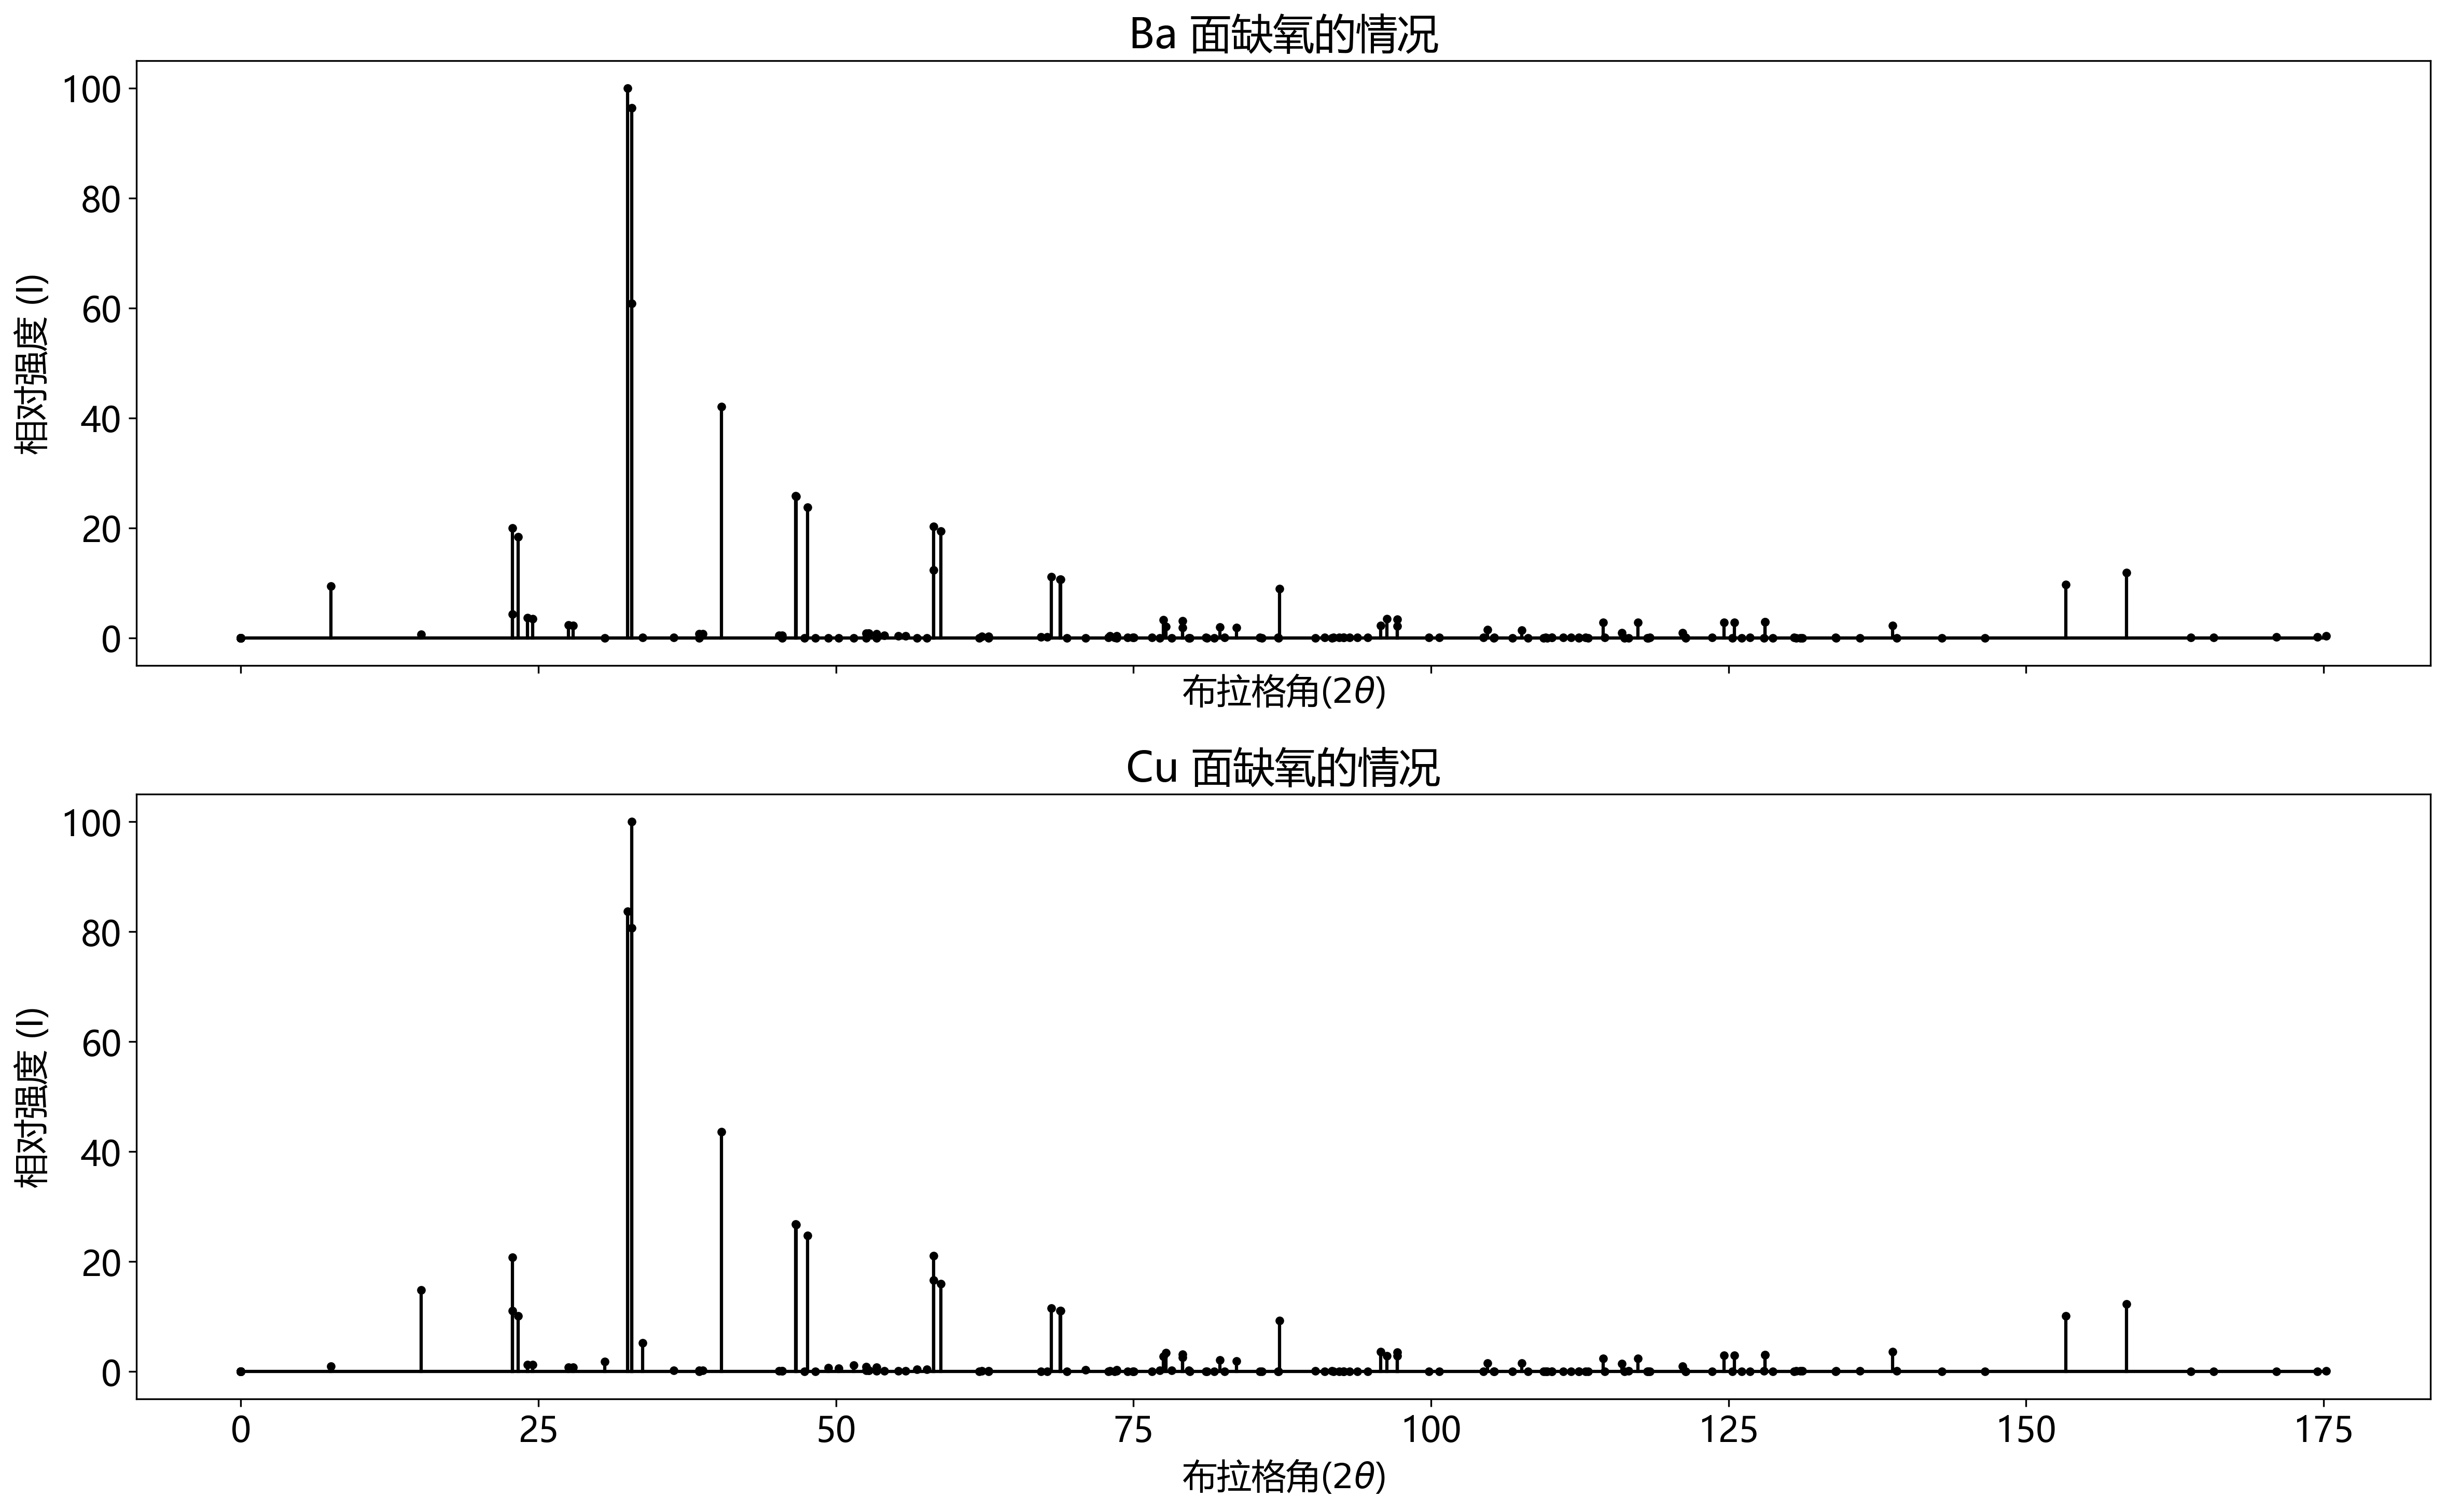

In [13]:
plt.rcParams['figure.figsize'] = (16.0, 10.0)
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.size'] = 16

fig, [ax1, ax2] = plt.subplots(2, 1, sharex=True)

ax1.stem(doub_thetas_h1, Is_r1, linefmt='k', markerfmt='k.', basefmt='k')
ax1.set_title('Ba 面缺氧的情况')
ax1.set_ylabel('相对强度 (I)');ax1.set_xlabel('布拉格角'+r'($2\theta$)')
ax2.stem(doub_thetas_h2, Is_r2, linefmt='k', markerfmt='k.', basefmt='k')
ax2.set_title('Cu 面缺氧的情况')
ax2.set_ylabel('相对强度 (I)');ax2.set_xlabel('布拉格角'+r'($2\theta$)')
plt.tight_layout()  #设置默认的间距

plt.savefig('img/X射线衍射强度分布-新.png')

####绘出的数据图像如下所示：